In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("20211216_Casos-e-obitos-ESP.csv", sep =";")
df

,Genero,Municipio,Asma,Diabetes,Cardiopatia,Doenca Hematologica,Doenca Hepatica,Doenca Neurologica,Doenca Renal,Imunodepressao,Obesidade,Pneumopatia,Puérpera,Síndrome De Down,Outros Fatores De Risco,Diagnostico Covid19,Data Inicio Sintomas,Idade,Obito
0,FEMININO,ADAMANTINA,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,NaN,NaN,0
1,FEMININO,ADAMANTINA,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,NaN,NaN,0
2,FEMININO,ADAMANTINA,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,NaN,NaN,0
3,FEMININO,ADAMANTINA,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,NaN,NaN,0
4,FEMININO,ADAMANTINA,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449547,MASCULINO,SANTOS,IGNORADO,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,03/06/2020,62.0,1
4449548,FEMININO,SANTOS,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,03/06/2020,54.0,0
4449549,MASCULINO,SANTOS,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,03/06/2020,56.0,0
4449550,FEMININO,SANTOS,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,03/06/2020,48.0,0


In [6]:
df = df.dropna()

In [8]:
woman = df[df ["Genero"]=="FEMININO"]
man = df[df ["Genero"]=="MASCULINO"]

In [11]:
print(len(man), len(woman))

2058663 2335282


Pode- se perceber que a COVID-19 em são paulo teve maior incidencia em mulheres do que  homens. Analisemos os dados de óbitos


In [12]:
death_man = man[man["Obito"]== True]
death_woman = woman[woman["Obito"]== True]
print(len(death_man)/len(man), len(death_woman)/len(woman))

0.042524687139177224 0.028748134058327858


Pode-se perceber que embora a COVID-19 tenha mais incidência em mulheres, a taxa de mortalidade é maior no caso dos homens


Vamos plotar um gráfico de óbito por idade


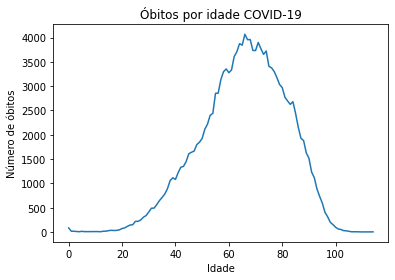

In [23]:
deaths = df[df["Obito"]==True]
deaths_by_age= deaths.groupby(["Idade"]).sum()
plt.plot(deaths_by_age)
plt.title("Óbitos por idade COVID-19")
plt.xlabel("Idade")
plt.ylabel("Número de óbitos")
plt.show()

Vamos analisar as doenças pré-existentes, a fim de responder a pergunta:

"Qual a doença pré-existente mais provável de se encontrar numa pessoa com covid"

In [37]:
class Doenca():
    def __init__(self,nome, tamanho) -> None:
        self.nome = nome
        self.tamanho = tamanho

In [42]:
doencas = []
doencas.append(Doenca("Asma", len(df[df["Asma"] == "SIM"]))) 
doencas.append(Doenca("Diabetes", len(df[df["Diabetes"] == "SIM"]))) 
doencas.append(Doenca("Cardiopatia", len(df[df["Cardiopatia"] == "SIM"]))) 
doencas.append(Doenca("Doenca Hematologica", len(df[df["Doenca Hematologica"] == "SIM"]))) 
doencas.append(Doenca("Doenca Hepatica", len(df[df["Doenca Hepatica"] == "SIM"]))) 
doencas.append(Doenca("Doenca Renal", len(df[df["Doenca Renal"] == "SIM"]))) 
doencas.append(Doenca("Imunodepressao", len(df[df["Imunodepressao"] == "SIM"])))
doencas.append(Doenca("Obesidade", len(df[df["Obesidade"] == "SIM"])))  
doencas.append(Doenca("Pneumopatia", len(df[df["Pneumopatia"] == "SIM"]))) 
doencas.append(Doenca("Puerpera", len(df[df["Puérpera"] == "SIM"]))) 
doencas.append(Doenca("Síndrome De Down", len(df[df["Síndrome De Down"] == "SIM"]))) 
doencas.append(Doenca("Outros Fatores De Risco", len(df[df["Outros Fatores De Risco"] == "SIM"]))) 
doencas.sort(key=lambda x: x.tamanho, reverse=True)
doencas[0].nome, doencas[1].nome, doencas[2].nome

('Cardiopatia', 'Diabetes', 'Outros Fatores De Risco')

Assim, as doenças com mais incidências em pessoas com COVID-19 são Cardiopatia e Diabetes